# Movie Rating Analysis

### Namyun Kim

##  Read in the Data

In [1]:
# rotten tomatoes movie data set from Maven's data playground
import pandas as pd

movies = pd.read_csv('../Data/Rotten Tomatoes Movies.csv')
movies.head(3)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0


In [2]:
# subset of the data for this project
movies = movies[['movie_title', 'rating', 'genre', 'in_theaters_date','runtime_in_minutes',
                 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count']]
movies.head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0
2,10,R,"Comedy, Romance",1979-10-05,118.0,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957-04-13,95.0,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",1954-01-01,127.0,89,27,74.0,68860.0


## Explore the Data

How many movies are in this data set?

In [3]:
movies.shape

(16638, 9)

Filter the data to only include movies that came out in 2010 or later. 

In [4]:
movies.dtypes

movie_title            object
rating                 object
genre                  object
in_theaters_date       object
runtime_in_minutes    float64
tomatometer_rating      int64
tomatometer_count       int64
audience_rating       float64
audience_count        float64
dtype: object

In [5]:
# convert in_theaters_date to a datetime field
movies['in_theaters_date'] = pd.to_datetime(movies.in_theaters_date )

In [6]:
movies.dtypes

movie_title                   object
rating                        object
genre                         object
in_theaters_date      datetime64[ns]
runtime_in_minutes           float64
tomatometer_rating             int64
tomatometer_count              int64
audience_rating              float64
audience_count               float64
dtype: object

In [7]:
# filter on only movies from the 2010's and newer
movies[movies.in_theaters_date.dt.year >= 2010] 
movies = movies[movies.in_theaters_date.dt.year >= 2010] 

In [8]:
movies.head(5)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0
97,Fireflies in the Garden,R,Drama,2011-10-14,98.0,22,54,45.0,45150.0
130,The Oxford Murders,R,"Art House & International, Drama, Horror, Myst...",2010-08-06,110.0,9,11,33.0,14548.0
155,Priest,PG-13,"Action & Adventure, Horror, Mystery & Suspense...",2011-05-13,83.0,15,99,46.0,86566.0


Find the highest rated movies according to both critics (*tomatometer_rating*) and the general audience (*audience_rating*).

In [9]:
# highest rating by critics
movies.sort_values('tomatometer_rating', ascending=False).head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
3093,"Batman: The Dark Knight Returns, Part 1",PG-13,"Action & Adventure, Animation",2012-01-01,134.0,100,5,93.0,8482.0
8500,King Georges,NR,Documentary,2016-02-26,78.0,100,9,54.0,240.0
8495,King Charles III,NR,Drama,2017-05-14,88.0,100,9,48.0,65.0
8477,Killing for Love (Das Versprechen),NR,"Art House & International, Documentary",2017-12-15,124.0,100,9,82.0,201.0
8461,Kill Zone 2 (Saat po long 2),NR,"Action & Adventure, Art House & International,...",2016-05-13,120.0,100,22,63.0,544.0


In [10]:
# highest rating by audience
movies.sort_values('audience_rating', ascending=False).head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
14566,The Miners' Hymns,NR,"Documentary, Drama, Special Interest",2012-02-08,52.0,100,10,100.0,148.0
9051,Little Monsters,R,"Comedy, Horror",2019-10-08,94.0,83,94,100.0,9.0
7137,Haunt,R,"Horror, Mystery & Suspense",2019-09-13,92.0,68,38,100.0,7.0
16438,Wonders of the Sea,NR,Documentary,2019-01-17,82.0,76,17,100.0,13.0
14580,The Most Dangerous Year,NR,Documentary,2019-04-12,90.0,91,11,100.0,40.0


These top movies seem to have very few critics and audience members writing the reviews. We want to look at only the most popular movies. Filter the movies data set to only include movies that have 100k+ audience ratings. 

In [11]:
movies[movies.audience_count >100000]
movies_popular = movies[movies.audience_count > 100000]

In [12]:
movies_popular.shape

(316, 9)

Find the highest rated **popular** movies according to both critics (*tomatometer_rating*) and the general audience (*audience_rating*).

In [13]:
movies_popular.sort_values('audience_rating', ascending=False)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
16634,Zootopia,PG,"Action & Adventure, Animation, Comedy",2016-03-04,108.0,97,279,92.0,100946.0
6950,Guardians of the Galaxy,PG-13,"Action & Adventure, Science Fiction & Fantasy",2014-08-01,121.0,91,316,92.0,254717.0
4077,Captain America: The Winter Soldier,PG-13,"Action & Adventure, Science Fiction & Fantasy",2014-04-04,136.0,90,292,92.0,281524.0
14397,The King's Speech,PG-13,Drama,2010-11-26,118.0,95,292,92.0,144306.0
14549,The Martian,PG-13,Science Fiction & Fantasy,2015-10-02,164.0,91,361,91.0,131093.0
...,...,...,...,...,...,...,...,...,...
8855,Legion,R,"Action & Adventure, Horror, Mystery & Suspense",2010-01-22,100.0,19,104,31.0,312684.0
8714,The Last Airbender,PG,"Action & Adventure, Kids & Family, Science Fic...",2010-07-01,103.0,5,189,30.0,321915.0
4275,Chernobyl Diaries,R,"Drama, Horror",2012-05-25,86.0,19,89,28.0,141874.0
8261,Jonah Hex,PG-13,"Action & Adventure, Drama, Horror, Western",2010-06-18,84.0,12,150,20.0,170670.0


In [14]:
movies_popular.sort_values('tomatometer_rating', ascending=False)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
7558,How to Train Your Dragon,PG,"Animation, Kids & Family, Science Fiction & Fa...",2010-03-26,98.0,99,208,91.0,312342.0
15416,Toy Story 3,G,"Animation, Comedy, Kids & Family",2010-06-18,103.0,98,305,89.0,606931.0
7925,Inside Out,PG,"Animation, Kids & Family",2015-06-19,94.0,98,357,89.0,136125.0
16634,Zootopia,PG,"Action & Adventure, Animation, Comedy",2016-03-04,108.0,97,279,92.0,100946.0
9355,Mad Max: Fury Road,R,"Action & Adventure, Science Fiction & Fantasy",2015-05-15,120.0,97,410,85.0,127428.0
...,...,...,...,...,...,...,...,...,...
5945,Fantastic Four,PG-13,Action & Adventure,2015-08-07,100.0,9,252,18.0,137562.0
6942,Grown Ups 2,PG-13,Comedy,2013-07-12,101.0,7,112,53.0,180859.0
8714,The Last Airbender,PG,"Action & Adventure, Kids & Family, Science Fic...",2010-07-01,103.0,5,189,30.0,321915.0
3387,"Big Mommas: Like Father, Like Son",PG-13,Comedy,2011-02-18,107.0,5,60,58.0,132093.0


 A lot of these popular movies seem to have a PG or PG-13 rating. How many movies fall under each type of rating?


In [15]:
movies_popular.rating.value_counts() 

rating
PG-13    160
R        100
PG        51
G          5
Name: count, dtype: int64

What is the average audience rating for each movie rating type? Which rating type is most highly rated?

In [16]:
movies_popular.groupby('rating')['audience_rating'].mean()

rating
G        66.200000
PG       66.823529
PG-13    67.293750
R        63.010000
Name: audience_rating, dtype: float64

## Create New Columns

Create a column in the DataFrame called 'Animation' and return a 1 if a movie is an 'Animation' movie and 0 otherwise. Do the same for *Action & Adventure* and *Comedy*.


In [32]:
movies_popular.head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Action & Adventure,Comedy,Animation
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0,1,1,0
248,Tron Legacy,PG,"Action & Adventure, Science Fiction & Fantasy",2010-12-17,125.0,51,239,63.0,171385.0,1,0,0
265,The Last Song,PG,"Drama, Kids & Family, Romance",2010-03-31,107.0,20,118,66.0,160777.0,0,0,0
274,Repo Men,R,"Action & Adventure, Science Fiction & Fantasy",2010-03-19,119.0,22,151,41.0,100453.0,1,0,0
284,Predators,R,"Action & Adventure, Horror, Science Fiction & ...",2010-07-09,107.0,65,198,52.0,159760.0,1,0,0


In [31]:
import numpy as np

movies_popular['Animation'] = np.where(movies_popular.genre.str.contains('Animation'), 1, 0)

In [26]:
# copy the movie to avoid warning
movies_popular = movies[movies.audience_count > 100000].copy()

In [27]:
# create the column for action & adventure
movies_popular['Action & Adventure'] = np.where(movies_popular.genre.str.contains('Action & Adventure'), 1, 0)

In [28]:
# create the column for comedy
movies_popular['Comedy'] = np.where(movies_popular.genre.str.contains('Comedy'), 1, 0)

In [34]:
movies_popular.head(5)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Action & Adventure,Comedy,Animation
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0,1,1,0
248,Tron Legacy,PG,"Action & Adventure, Science Fiction & Fantasy",2010-12-17,125.0,51,239,63.0,171385.0,1,0,0
265,The Last Song,PG,"Drama, Kids & Family, Romance",2010-03-31,107.0,20,118,66.0,160777.0,0,0,0
274,Repo Men,R,"Action & Adventure, Science Fiction & Fantasy",2010-03-19,119.0,22,151,41.0,100453.0,1,0,0
284,Predators,R,"Action & Adventure, Horror, Science Fiction & ...",2010-07-09,107.0,65,198,52.0,159760.0,1,0,0


Create a table where each row is a rating, each column is a genre and each value is the number of movies of that particular rating and genre. 


What insights do you gather?

In [33]:
# creating summary table
movies_popular.groupby('rating')[['Animation', 'Action & Adventure', 'Comedy']].sum()

,Animation,Action & Adventure,Comedy
rating,,,
G,5,3,5
PG,26,27,29
PG-13,0,102,35
R,0,41,35


In [ ]:
# For most of animation rate is PG while action & adventure and Comedy rate is PG and PG-13.

what's the insight from both critics against the genre?

In [35]:
# both critics and the general audience love animated movies
movies_popular.groupby('Animation')[['tomatometer_rating', 'audience_rating']].mean()

,tomatometer_rating,audience_rating
Animation,,
0,58.340351,64.831579
1,75.258065,75.161290


In [36]:
# the generatl audience likes Action & Adventure more than critics
movies_popular.groupby('Action & Adventure')[['tomatometer_rating', 'audience_rating']].mean()

,tomatometer_rating,audience_rating
Action & Adventure,,
0,59.111888,65.391608
1,60.734104,66.219653


In [37]:
# comeides have lower ratings than other genres
movies_popular.groupby('Comedy')[['tomatometer_rating', 'audience_rating']].mean()

,tomatometer_rating,audience_rating
Comedy,,
0,62.169811,67.353774
1,55.576923,62.769231


## 3. Visualize the Data

Create visualization from the popular movies DataFrame.

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt



How are movies distributed across different rating categories (G, PG, PG-13, R, NR)?



In [46]:
# Count of movies in each rating category
rating_counts = movies_popular['rating'].value_counts()


C:\Users\namyu\AppData\Local\Temp\ipykernel_9736\171820667.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


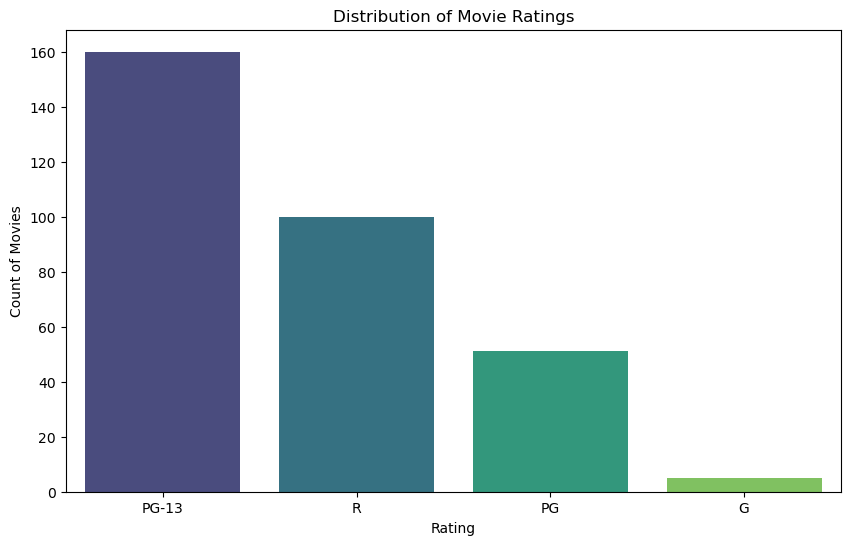

In [47]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count of Movies')
plt.show()
# Pg13 movies havve the most ratings

2. How has the number of movie releases changed over the years?

In [49]:
movies_popular['release_year'] = pd.to_datetime(movies_popular['in_theaters_date']).dt.year


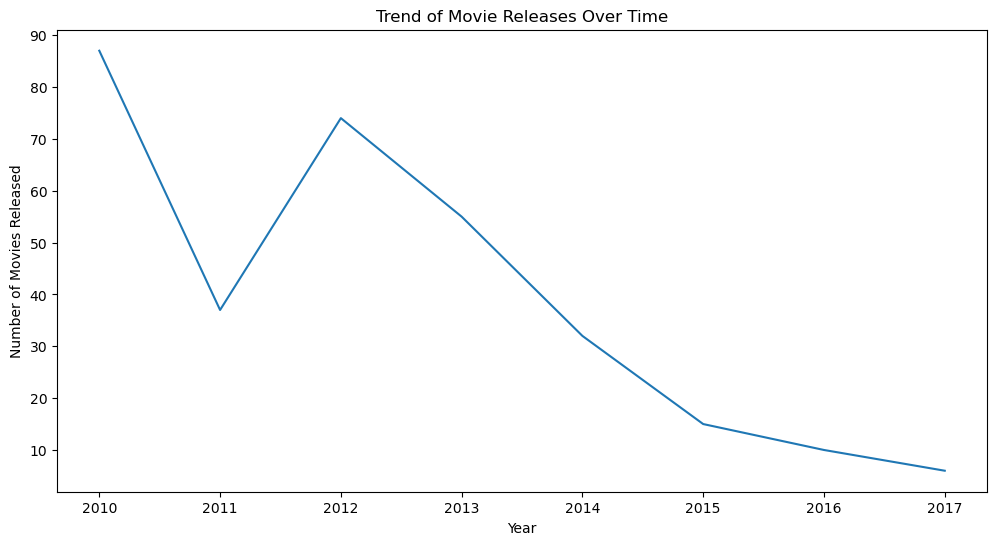

In [51]:
# Count of movies released each year
release_trend = movies_popular['release_year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=release_trend.index, y=release_trend.values)
plt.title('Trend of Movie Releases Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.show()
# there is a spike between 2011 and 2012. After that it is gradually decreased

3. What is the average runtime of movies across different genres?

In [52]:
# Split genres into separate rows
genre_runtime = movies_popular[['genre', 'runtime_in_minutes']].copy()
genre_runtime = genre_runtime.dropna()
genre_runtime = genre_runtime.assign(genre=genre_runtime['genre'].str.split(', ')).explode('genre')

In [82]:
# Calculate average runtime for each genre
average_runtime = genre_runtime.groupby('genre')['runtime_in_minutes'].mean().sort_values(ascending=False)
average_runtime
# Classic is the highest runtime genre and documentary is the shortest runtime genre.

genre
Classics                     137.000000
Special Interest             126.000000
Western                      125.400000
Drama                        121.777778
Science Fiction & Fantasy    119.706897
Action & Adventure           117.664740
Mystery & Suspense           116.030769
Sports & Fitness             115.000000
Musical & Performing Arts    114.000000
Romance                      113.125000
Comedy                       104.826923
Kids & Family                102.325581
Horror                       101.384615
Animation                     96.774194
Art House & International     94.333333
Documentary                   92.000000
Name: runtime_in_minutes, dtype: float64

C:\Users\namyu\AppData\Local\Temp\ipykernel_9736\2059207100.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_runtime.values, y=average_runtime.index, palette='viridis')


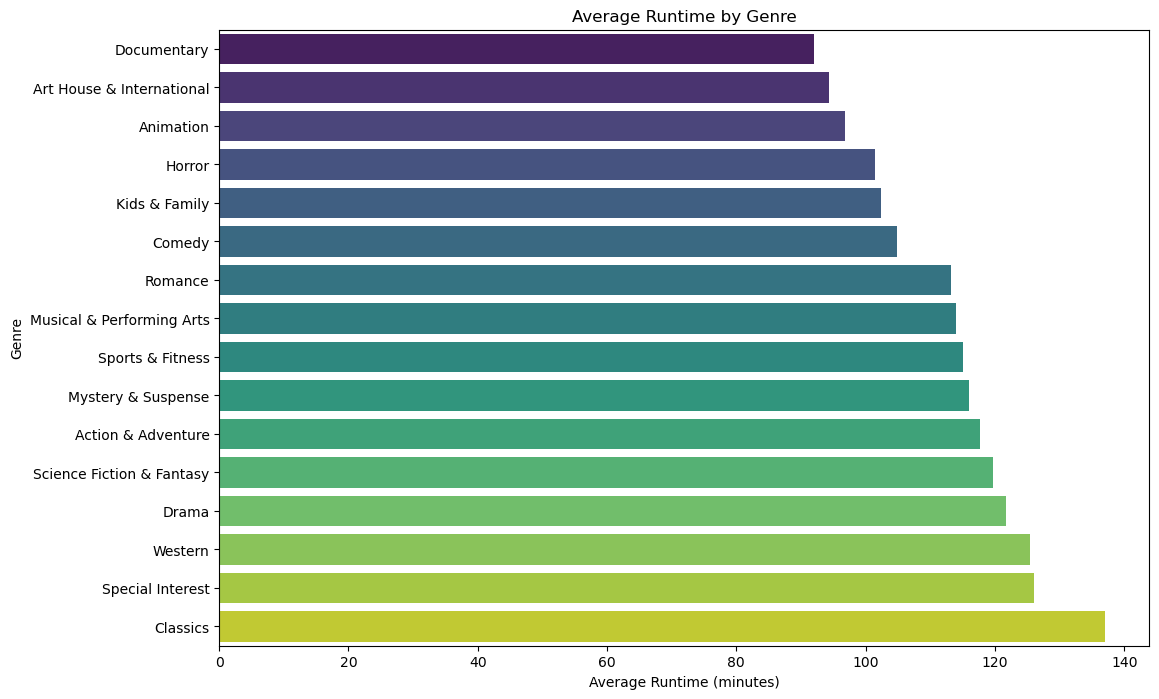

In [54]:
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=average_runtime.values, y=average_runtime.index, palette='viridis')
plt.title('Average Runtime by Genre')
plt.xlabel('Average Runtime (minutes)')
plt.ylabel('Genre')
plt.show()

4. Is there a correlation between critics' ratings (Tomatometer) and audience ratings?

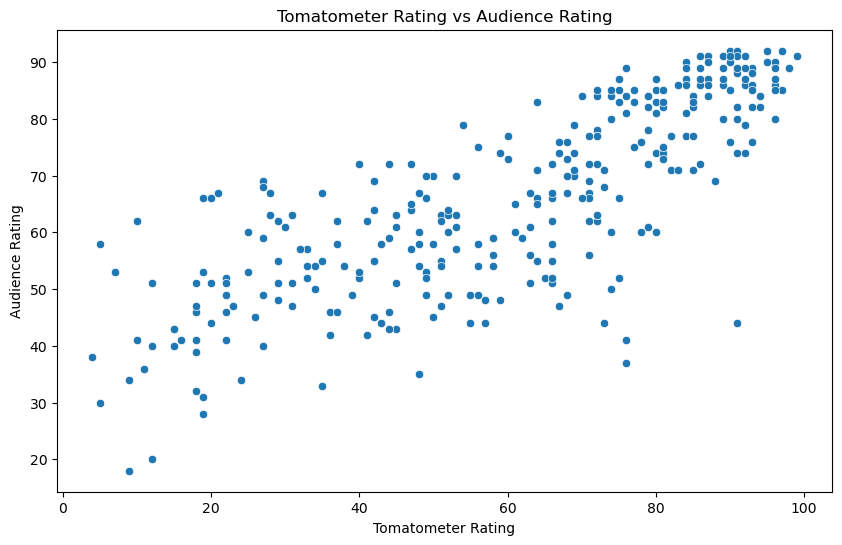

In [83]:
# Scatter plot for Tomatometer vs Audience Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tomatometer_rating', y='audience_rating', data=movies_popular)
plt.title('Tomatometer Rating vs Audience Rating')
plt.xlabel('Tomatometer Rating')
plt.ylabel('Audience Rating')
plt.show()

# As the Tomatometer rating increases, the Audience rating also tends to increase.
# This suggests that movies that are well-received by critics are generally also well-received by audiences.
# For lower Tomatometer ratings below 50, there is a wide spread in Audience ratings
# This variation suggests that audience preferences can sometimes differ significantly from critics' opinions.

5. What is the correlation to compare with tomatometer rating and audience rating against the run time?

In [65]:
# Filter out rows with missing values for the required columns
filtered_df = movies_popular[['runtime_in_minutes', 'tomatometer_rating', 'audience_rating']].dropna()

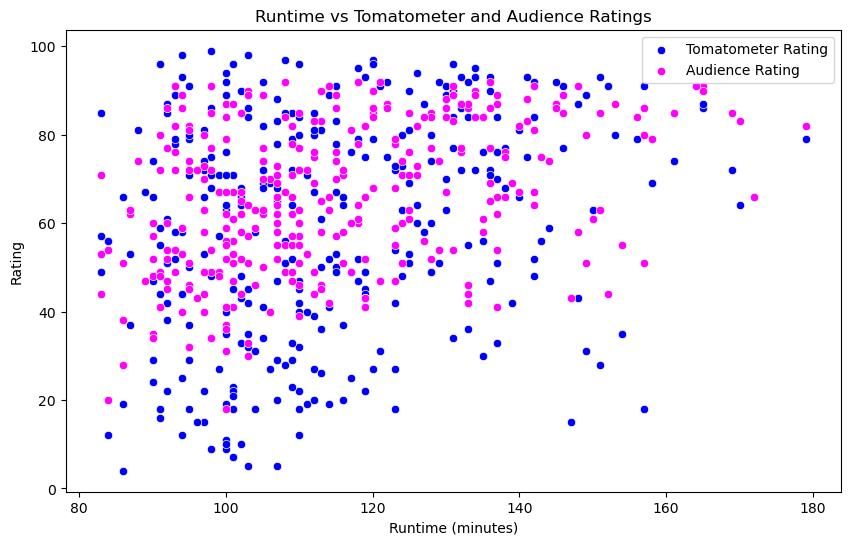

In [84]:
# Scatter plot for Runtime vs Tomatometer Rating and Audience Rating
plt.figure(figsize=(10, 6))

sns.scatterplot(x='runtime_in_minutes', y='tomatometer_rating', data=filtered_df, label='Tomatometer Rating', color='blue')
sns.scatterplot(x='runtime_in_minutes', y='audience_rating', data=filtered_df, label='Audience Rating', color='magenta')

plt.title('Runtime vs Tomatometer and Audience Ratings')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating')
plt.legend()
plt.show()

# both critics are spread across the entire range of runtimes, indicating no strong direct correlation between runtime and ratings.
# There is a noticeable cluster of movies with runtimes between 90 to 120 minutes. This clustering suggests that a majority of movies fall within this runtime range.
# 

6. Which genres are most popular among audiences based on audience count?

In [62]:
# Split genres into separate rows
genre_audience = movies_popular[['genre', 'audience_count']].copy()
genre_audience = genre_audience.dropna()
genre_audience = genre_audience.assign(genre=genre_audience['genre'].str.split(', ')).explode('genre')

In [63]:
# Calculate total audience count for each genre
total_audience = genre_audience.groupby('genre')['audience_count'].sum().sort_values(ascending=False)

C:\Users\namyu\AppData\Local\Temp\ipykernel_9736\1196056318.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_audience.values, y=total_audience.index, palette='viridis')


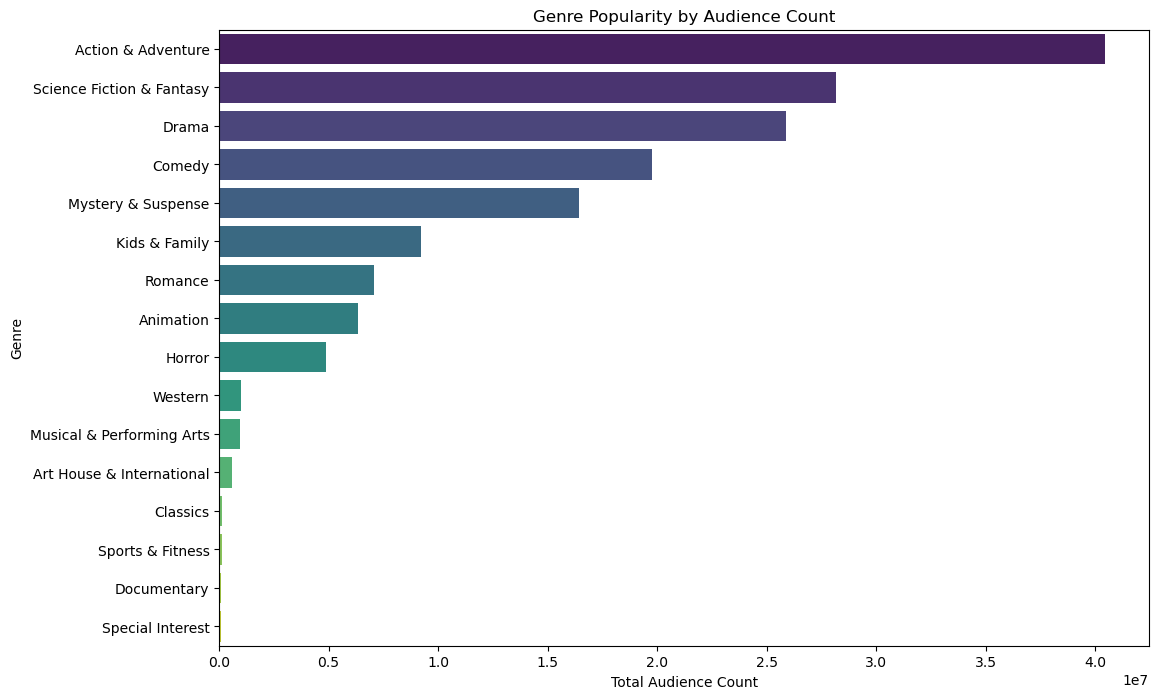

In [64]:
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=total_audience.values, y=total_audience.index, palette='viridis')
plt.title('Genre Popularity by Audience Count')
plt.xlabel('Total Audience Count')
plt.ylabel('Genre')
plt.show()

# This bar chart illustrates the popularity of different movie genres based on the total audience count. 
# Action & Adventure is by far the most popular genre, with a significantly higher total audience count compared to other genres.

7. How do different genres correlate with average Tomatometer ratings and audience ratings?

In [68]:
# Split genres into separate rows
genre_ratings = movies_popular[['genre', 'tomatometer_rating', 'audience_rating']].dropna()
genre_ratings = genre_ratings.assign(genre=genre_ratings['genre'].str.split(', ')).explode('genre')


In [69]:
# Calculate average ratings for each genre
average_ratings = genre_ratings.groupby('genre').mean()

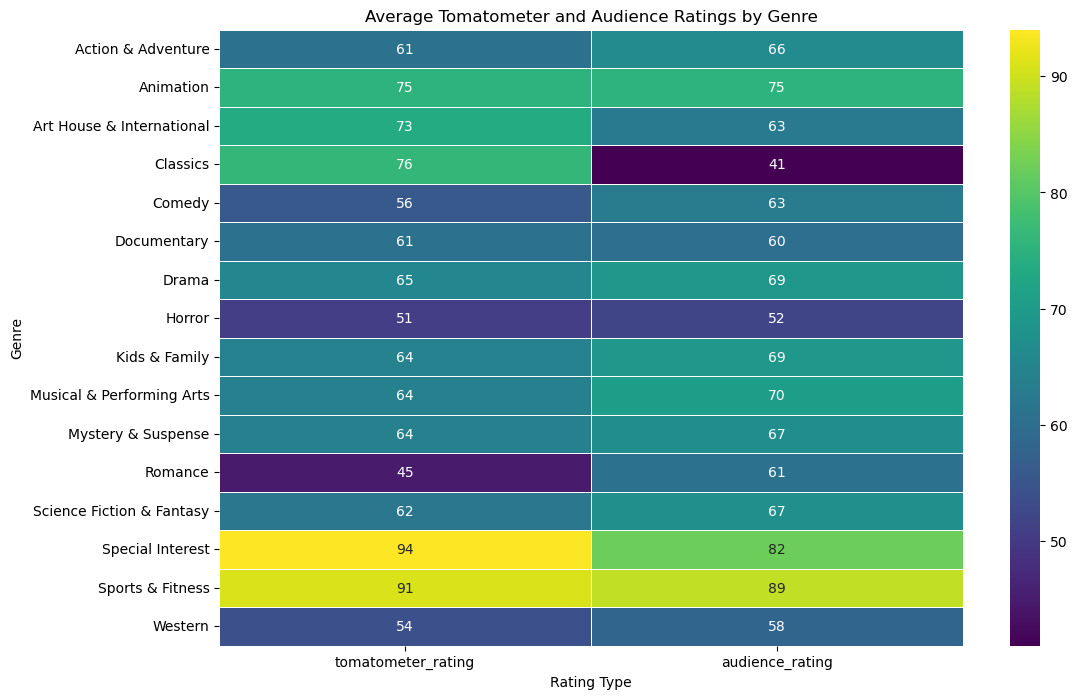

In [70]:
# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(average_ratings, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Average Tomatometer and Audience Ratings by Genre')
plt.xlabel('Rating Type')
plt.ylabel('Genre')
plt.show()

# This heatmap provides insights into the preferences and opinions of both critics and audiences across different movie genres, guiding decisions in content production and marketing.
# It highlights areas of alignment and discrepancy between critic and audience ratings
# Understanding these differences can help tailor marketing strategies and content creation to better meet the preferences of both critics and audiences.

8. How has the popularity of different genres changed over time?

In [72]:
# Extract year from 'in_theaters_date'
movies_popular['release_year'] = pd.to_datetime(movies_popular['in_theaters_date']).dt.year

In [74]:
# Split genres into separate rows
genre_year = movies_popular[['genre', 'release_year']].dropna()
genre_year = genre_year.assign(genre=genre_year['genre'].str.split(', ')).explode('genre')
genre_year

,genre,release_year
0,Action & Adventure,2010
0,Comedy,2010
0,Drama,2010
0,Science Fiction & Fantasy,2010
248,Action & Adventure,2010
...,...,...
16591,Romance,2010
16612,Drama,2013
16634,Action & Adventure,2016
16634,Animation,2016


In [78]:
# Count the number of movies released each year for each genre
genre_trend = genre_year.groupby(['release_year', 'genre']).size().reset_index(name='count')
genre_trend = genre_trend.sort_values(by='count', ascending=False)
genre_trend

,release_year,genre,count
0,2010,Action & Adventure,44
2,2010,Comedy,39
3,2010,Drama,38
24,2012,Action & Adventure,31
28,2012,Drama,28
...,...,...,...
67,2016,Drama,1
35,2012,Western,1
70,2017,Comedy,1
10,2010,Sports & Fitness,1


In [79]:
# Pivot the dataframe for easier plotting
genre_trend_pivot = genre_trend.pivot(index='release_year', columns='genre', values='count').fillna(0)

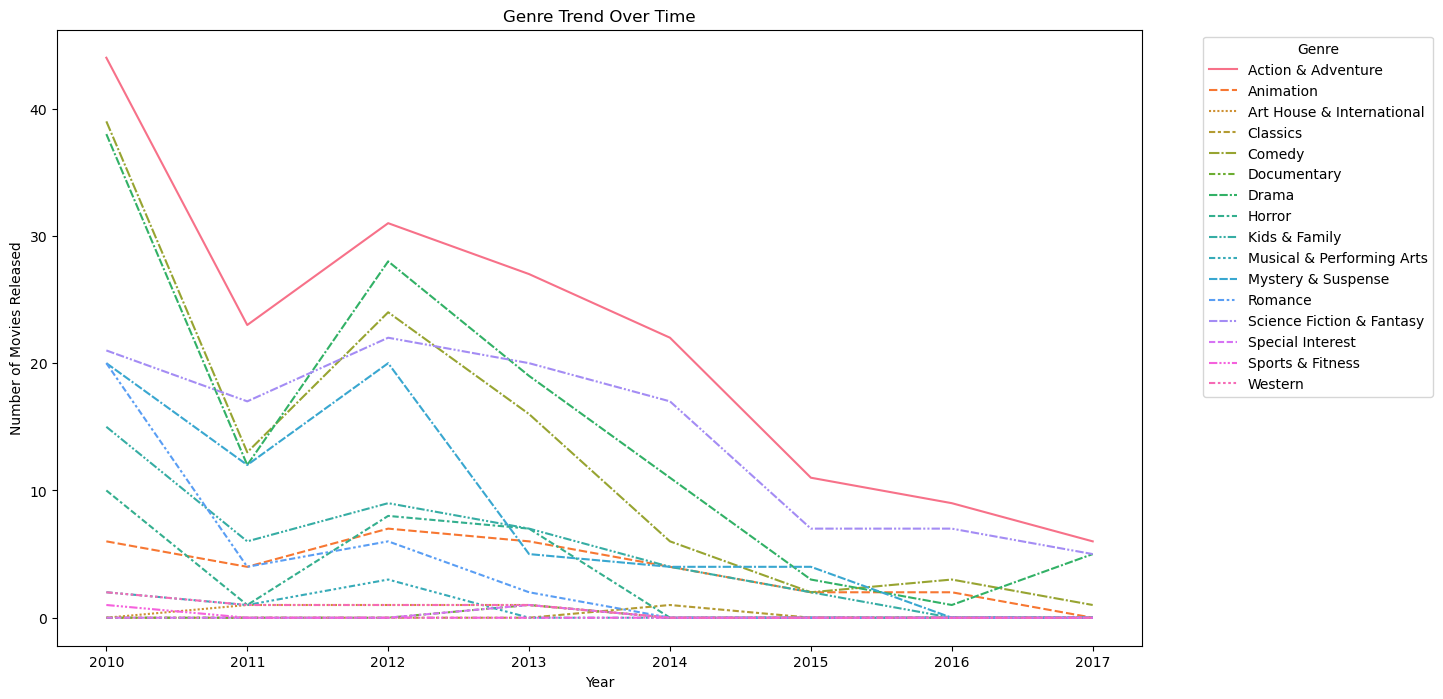

In [80]:
# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=genre_trend_pivot)
plt.title('Genre Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# This line chart illustrates the trend of movie releases across various genres from 2010 to 2017
# It shows significant variability from year to year for most genres, with some years seeing higher releases compared to others.
# Action & Adventure shows the highest number of releases in 2010, peaking at over 40 movies.
# Comedy, Drama, Documentary, Science Fiction & Fantasy, and Kids & Family, show a declining trend over the observed period.
# Musical & Performing Arts is a noticeable increase from 2016 to 2017.
# Possibly due to changing audience preferences, financial constraints, or film industry shifts towards other forms of media consumption.